lazypredict https://pypi.org/project/lazypredict/

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import clear_output
from functools import partial
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [3]:
from sklearn import *
import sklearn as sklearn
chosen_regressors = [('ARDRegression', sklearn.linear_model._bayes.ARDRegression),
 ('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('CCA', sklearn.cross_decomposition._pls.CCA),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sklearn.linear_model._huber.HuberRegressor),
 ('KNeighborsRegressor', sklearn.neighbors._regression.KNeighborsRegressor),
 ('Lars', sklearn.linear_model._least_angle.Lars),
 ('LarsCV', sklearn.linear_model._least_angle.LarsCV),
 ('Lasso', sklearn.linear_model._coordinate_descent.Lasso),
 ('LassoCV', sklearn.linear_model._coordinate_descent.LassoCV),
 ('LassoLars', sklearn.linear_model._least_angle.LassoLars),
 ('LassoLarsCV', sklearn.linear_model._least_angle.LassoLarsCV),
 ('LassoLarsIC', sklearn.linear_model._least_angle.LassoLarsIC),
 ('LinearRegression', sklearn.linear_model._base.LinearRegression),
 ('LinearSVR', sklearn.svm._classes.LinearSVR),
 ('MLPRegressor', sklearn.neural_network._multilayer_perceptron.MLPRegressor),
 ('OrthogonalMatchingPursuit',
  sklearn.linear_model._omp.OrthogonalMatchingPursuit),
 ('OrthogonalMatchingPursuitCV',
  sklearn.linear_model._omp.OrthogonalMatchingPursuitCV),
 ('PassiveAggressiveRegressor',
  sklearn.linear_model._passive_aggressive.PassiveAggressiveRegressor),
 ('PoissonRegressor', sklearn.linear_model._glm.glm.PoissonRegressor),
 ('RANSACRegressor', sklearn.linear_model._ransac.RANSACRegressor),
 ('RandomForestRegressor', sklearn.ensemble._forest.RandomForestRegressor),
 ('Ridge', sklearn.linear_model._ridge.Ridge),
 ('RidgeCV', sklearn.linear_model._ridge.RidgeCV),
 ('SGDRegressor', sklearn.linear_model._stochastic_gradient.SGDRegressor),
 ('SVR', sklearn.svm._classes.SVR),
 ('TheilSenRegressor', sklearn.linear_model._theil_sen.TheilSenRegressor),
 ('TransformedTargetRegressor',
  sklearn.compose._target.TransformedTargetRegressor),
 ('TweedieRegressor', sklearn.linear_model._glm.glm.TweedieRegressor)]

In [4]:
X_train = train.drop('ttf', axis=1)
y_train = train['ttf']
X_test = test.drop('ttf', axis=1)
y_test = test['ttf']

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [6]:
reg.score(X_test, y_test)

0.6590268440608174

In [7]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=chosen_regressors)
models = reg.fit(X_train, X_test, y_train, y_test)

models

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|███████████████████████████████████████████| 38/38 [00:48<00:00,  1.28s/it]


(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                         
 GradientBoostingRegressor                    0.73       0.73  0.10        4.60
 HistGradientBoostingRegressor                0.73       0.73  0.10        0.76
 ExtraTreesRegressor                          0.73       0.73  0.10        6.17
 RandomForestRegressor                        0.72       0.72  0.10       15.26
 MLPRegressor                                 0.71       0.71  0.10        1.32
 SVR                                          0.71       0.71  0.10        7.70
 BaggingRegressor                             0.70       0.70  0.10        1.55
 KNeighborsRegressor                          0.67       0.67  0.11        1.41
 LassoCV                                      0.66       0.66  0.11        0.20
 ElasticNetCV                                 0.66       0.66  0.11        0.18
 LinearRegression                       

In [22]:
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor(learning_rate=0.05, loss='poisson', max_leaf_nodes=31, min_samples_leaf=25)
est.fit(X_train, y_train)
est.score(X_test, y_test)

0.7296240889636824

In [13]:
y = est.predict(X_test)

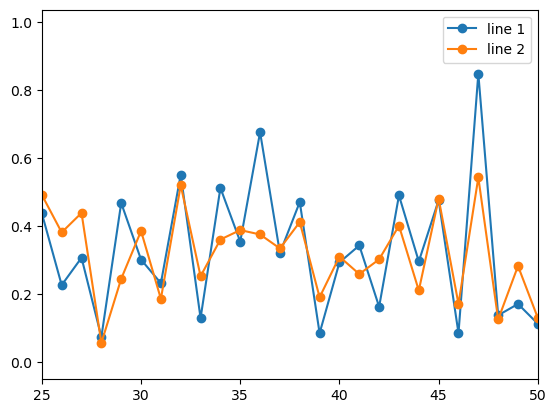

In [14]:
button_left = Button(description="<<")
button_right = Button(description=">>")
df = pd.DataFrame(y)
x_range = [25, 50]

# plot lines
plt.plot(y_test.index.values, y_test, label = "line 1", marker='o')
plt.plot(df.index.values, df, label = "line 2", marker='o')
plt.legend()
plt.xlim(x_range)
plt.show()

def clicked(arg, value:int):
    if(x_range[0] == 0 & value<0):
        return
    x_range[0] = x_range[0] + value
    x_range[1] = x_range[1] + value
    plt.plot(y_test.index.values, y_test, label = "line 1", marker='o')
    plt.plot(df.index.values, df, label = "line 2", marker='o')
    plt.legend()
    plt.xlim(x_range)
    clear_output(wait=True)
    plt.show()
    display(widgets.HBox((button_left, button_right)))

button_left.on_click(partial(clicked, value=-25))
button_right.on_click(partial(clicked, value=25))
    
display(widgets.HBox((button_left, button_right)))

In [20]:
from tune_sklearn import TuneSearchCV

import scipy

parameters = {'learning_rate': [0.025,0.05,0.1,0.15,0.2],
              'loss': ['squared_error', 'absolute_error', 'poisson'],
              'max_leaf_nodes': [31,50,100,None],
              'min_samples_leaf': [10,15,20,25]
                 }

tune_search = TuneSearchCV(HistGradientBoostingRegressor(), param_distributions=parameters,verbose=True, n_trials=241)


tune_search.fit(X_train, y_train)
print(tune_search.best_params_)

2023-01-12 21:19:33,927	WARNING util.py:244 -- The `on_step_end` operation took 0.503 s, which may be a performance bottleneck.
2023-01-12 21:38:52,038	WARNING util.py:244 -- The `on_step_end` operation took 0.807 s, which may be a performance bottleneck.
2023-01-13 01:38:32,375	INFO tune.py:762 -- Total run time: 20097.36 seconds (20097.15 seconds for the tuning loop).


{'learning_rate': 0.05, 'loss': 'poisson', 'max_leaf_nodes': 31, 'min_samples_leaf': 25}
